In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [5]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


False

In [9]:
 df=pd.read_csv('aligarh.csv')

In [7]:
df=df[df['content'].str.len()>200]

In [10]:
df.head(10)

,Unnamed: 0,date,content
0,0,2022-10-31 19:21:08+00:00,What the Attack on Paul Pelosi Says About Amer...
1,1,2022-10-31 15:51:28+00:00,@satwik507 Kasam se bhai... Matlab ek bowler a...
2,2,2022-10-31 10:29:47+00:00,every time i scroll my tl i get a panic attack...
3,3,2022-10-31 03:01:20+00:00,@AAPNareshBalyan Sadji aapke party ke neta to ...
4,4,2022-10-31 02:54:59+00:00,"@suhasinih More than the govt, it's the Islami..."
5,5,2022-10-30 13:41:26+00:00,Now the southafricans will bring the attack to...
6,6,2022-10-30 13:05:29+00:00,@sakshijoshii @rohini_sgh Attack is justified ...
7,7,2022-10-30 01:41:01+00:00,Bahut hi bhayanak manjar itni badi sankhya m e...
8,8,2022-10-29 23:21:04+00:00,Barack Obama Lamented the Attack on Paul Pelos...
9,9,2022-10-29 07:55:50+00:00,@CricCrazyJohns He just need to play his natur...


In [11]:
 df=df.drop('Unnamed: 0',axis=1)

In [12]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)

In [36]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df['clean']=df['content'].apply(preprocess_text);

In [14]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

In [15]:
dfnew

,date,content,clean,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,2022-10-31 19:21:08+00:00,What the Attack on Paul Pelosi Says About Amer...,attack paul pelosi say america today,0.000000,0.000000,Neutral
1,2022-10-31 15:51:28+00:00,@satwik507 Kasam se bhai... Matlab ek bowler a...,satwik507 kasam se bhai matlab ek bowler aaya ...,0.400000,0.100000,Positive
2,2022-10-31 10:29:47+00:00,every time i scroll my tl i get a panic attack...,everi time scroll tl get panic attack,0.000000,0.000000,Neutral
3,2022-10-31 03:01:20+00:00,@AAPNareshBalyan Sadji aapke party ke neta to ...,aapnareshbalyan sadji aapk parti ke neta pahl ...,0.000000,0.000000,Neutral
4,2022-10-31 02:54:59+00:00,"@suhasinih More than the govt, it's the Islami...",suhasinih govt islamist persecut h bangladesh ...,0.175000,-0.287500,Negative
...,...,...,...,...,...,...
348,2013-04-27 00:55:38+00:00,Sarabjit Singh critical after attack in Lahore...,sarabjit singh critic attack lahor jail pak inmat,0.000000,-0.100000,Negative
349,2013-03-27 18:52:52+00:00,“@Pawandeeep: HAVING A LAUGH ATTACK?? ...,“ pawandeeep laugh attack k ” k,0.100000,0.300000,Positive
350,2013-03-08 08:11:00+00:00,@Israel So plz give sm good wishes 2 Palestini...,israel plz give sm good wish 2 palestinian wom...,0.600000,0.700000,Positive
351,2012-09-30 13:57:02+00:00,Wat more to ask... #IndvsPak Sunday.. Night sh...,wat ask indvspak sunday night show attack,0.000000,0.000000,Neutral


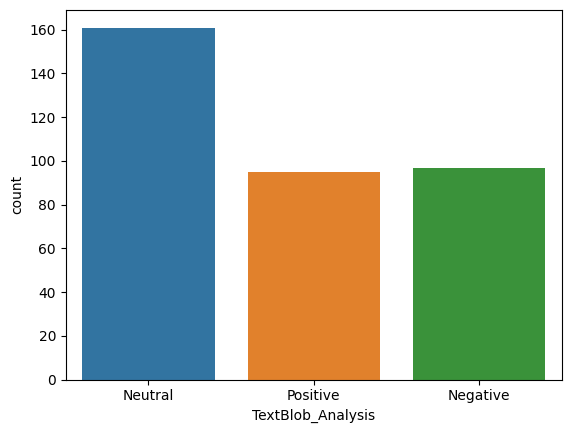

In [16]:
sns.countplot(x=dfnew.TextBlob_Analysis)
plt.show()

In [17]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

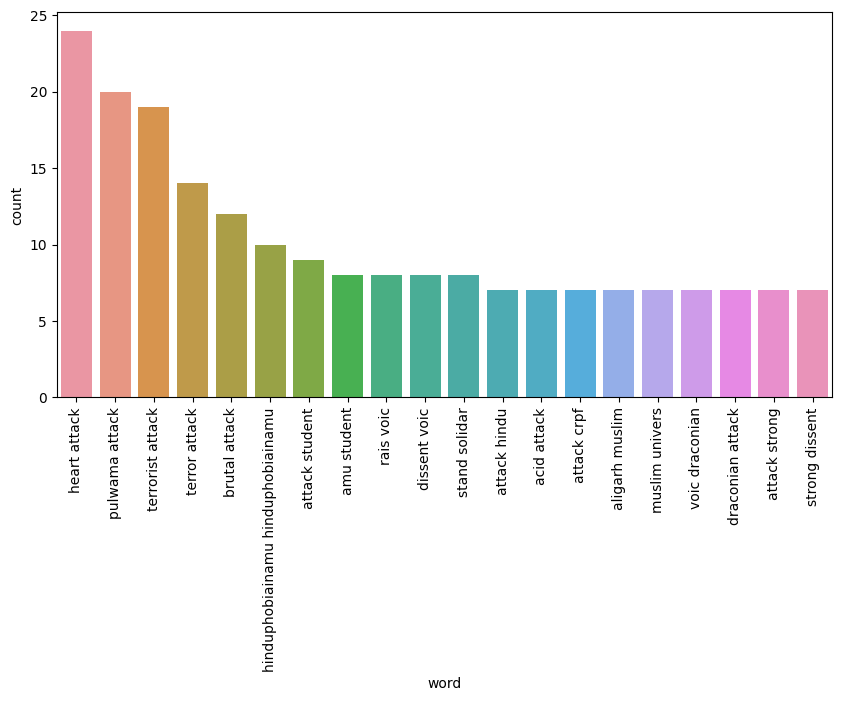

,word,count
0,heart attack,24
1,pulwama attack,20
2,terrorist attack,19
3,terror attack,14
4,brutal attack,12
5,hinduphobiainamu hinduphobiainamu,10
6,attack student,9
7,amu student,8
8,rais voic,8
9,dissent voic,8


In [18]:
get_n_grams(df.clean,2,2,20)